In [1]:
import pandas as pd

df = pd.read_csv('./data/train.csv')
df

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,b,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,...,2.859,144.665,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
249996,349996,b,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,...,-0.867,80.408,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
249997,349997,s,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,...,-2.890,198.907,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992
249998,349998,b,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,...,0.811,112.718,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [6]:
(df[df.PRI_jet_num==3].DER_mass_MMC==-999).sum()

1477

In [2]:
for column in df:
    print(column, (df[column]==-999).sum())

Id 0
Prediction 0
DER_mass_MMC 38114
DER_mass_transverse_met_lep 0
DER_mass_vis 0
DER_pt_h 0
DER_deltaeta_jet_jet 177457
DER_mass_jet_jet 177457
DER_prodeta_jet_jet 177457
DER_deltar_tau_lep 0
DER_pt_tot 0
DER_sum_pt 0
DER_pt_ratio_lep_tau 0
DER_met_phi_centrality 0
DER_lep_eta_centrality 177457
PRI_tau_pt 0
PRI_tau_eta 0
PRI_tau_phi 0
PRI_lep_pt 0
PRI_lep_eta 0
PRI_lep_phi 0
PRI_met 0
PRI_met_phi 0
PRI_met_sumet 0
PRI_jet_num 0
PRI_jet_leading_pt 99913
PRI_jet_leading_eta 99913
PRI_jet_leading_phi 99913
PRI_jet_subleading_pt 177457
PRI_jet_subleading_eta 177457
PRI_jet_subleading_phi 177457
PRI_jet_all_pt 0


In [3]:
print((df['Prediction']=='s').sum())

85667


In [4]:
df.PRI_jet_num.value_counts()

0    99913
1    77544
2    50379
3    22164
Name: PRI_jet_num, dtype: int64

In [5]:
from helpers import *
PATH = './data/train.csv'
y_raw, tx_raw, ids_raw = load_csv_data(PATH)
print(y_raw, tx_raw, ids_raw)

[ 1. -1. -1. ...  1. -1. -1.] [[ 138.47    51.655   97.827 ...    1.24    -2.475  113.497]
 [ 160.937   68.768  103.235 ... -999.    -999.      46.226]
 [-999.     162.172  125.953 ... -999.    -999.      44.251]
 ...
 [ 105.457   60.526   75.839 ... -999.    -999.      41.992]
 [  94.951   19.362   68.812 ... -999.    -999.       0.   ]
 [-999.      72.756   70.831 ... -999.    -999.       0.   ]] [100000 100001 100002 ... 349997 349998 349999]


In [6]:
print(y_raw.shape)
print(tx_raw.shape)

(250000,)
(250000, 30)


In [7]:
lambda_max = np.linalg.eigvals(tx_raw.T @ tx_raw).max()
lambda_min = np.linalg.eigvals(tx_raw.T @ tx_raw).min()
print(lambda_max, lambda_min, lambda_max/lambda_min)

1433657413944.2444 0.018716709833493845 76597726133398.3


In [8]:
y_raw[y_raw==-1] = 0
y_raw = y_raw.reshape(-1, 1)
y = y_raw

In [9]:
col_mask = np.zeros(tx_raw.shape[1], dtype=bool)
col_mask[[1, 2, 3, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]] = True
tx_cleaned = tx_raw[:, col_mask]
tx_cleaned.shape

(250000, 18)

In [10]:
lambda_max = np.linalg.eigvals(tx_cleaned.T @ tx_cleaned).max()
lambda_min = np.linalg.eigvals(tx_cleaned.T @ tx_cleaned).min()
print(lambda_max, lambda_min, lambda_max/lambda_min)

28883717934.663532 30427.822613370296 949253.526999718


In [11]:
from implementations import *


def predict_linear(tx, w, threshold=0.5):
    """Predict values from linear regression. If probability > threshold, predict 1.
    Args:
        tx: numpy array of shape (N, D), D is the number of features.
        w: optimal weights, numpy array of shape(D, 1), D is the number of features.
        threshold: scalar, default = 0.5, threshold for decision.

    Returns:    
        y_pred: numpy array of shape (N, 1) with labels 1 or 0, N is the number of samples.
    """

    y_pred = tx @ w
    y_pred[y_pred>=threshold] = 1
    y_pred[y_pred<threshold] = 0
    
    return y_pred


def predict_logistic(tx, w, threshold=0.5):
    """Predict values from logistic regression. If probability > threshold, predict 1.
    Args:
        tx: numpy array of shape (N, D), D is the number of features.
        w: optimal weights, numpy array of shape(D, 1), D is the number of features.
        threshold: scalar, default = 0.5, threshold for decision.

    Returns:    
        y_pred: numpy array of shape (N, 1) with labels 1 or 0, N is the number of samples.
    """

    y_pred = sigmoid(tx @ w)
    y_pred[y_pred>=threshold] = 1
    y_pred[y_pred<threshold] = 0

    return y_pred


def compute_metrics(y, y_pred):
    """Compute prediction accuracy, f1-score, precision, recall.
    Args:
        y: numpy array of shape (N, 1), the true label.
        y_pred: numpy array of shape (N, 0), the prediction.

    Returns:    
        accuracy: the scalar of accuracy.
        f1_score: the scalar of f1_score.
        precision: the scalar of precision.
        recall: the scalar of recall.
    """

    accuracy = (y==y_pred).sum() / y.shape[0]
    precision = ((y==y_pred) & (y==1)).sum() / y_pred.sum()
    recall = ((y==y_pred) & (y==1)).sum() / y.sum()
    f1_score = 2 / (1 / precision + 1 / recall)
    return accuracy, precision, recall, f1_score

In [12]:
def standardization(tx):
    """Standardize the input by (X-mu) / sigma
    Args:
        tx: numpy array of shape (N, D), D is the number of features.

    Returns:    
        tx_std: standardized numpy array of shape (N, D), D is the number of features.
    """

    eps = 1e-9  # avoid being divided by zero
    return (tx - np.mean(tx, axis=0)) / (eps + np.std(tx, axis=0))

In [13]:
GAMMA = 0.1
LAMBDA = 1e-4
MAX_ITER = 500
THRESHOLD = 85667 / 250000

In [65]:
tx = standardization(tx_cleaned)
y = y_raw
initial_w = np.random.rand(tx.shape[1], 1)

In [15]:
w, loss = reg_logistic_regression(y, tx, LAMBDA, initial_w, 1000, 0.1)
print(w, loss)

[[-0.5844448 ]
 [-0.68071164]
 [ 0.15178409]
 [ 0.72320631]
 [-0.11512168]
 [-0.1022881 ]
 [-0.34231559]
 [ 0.26950165]
 [ 0.64330356]
 [-0.00254386]
 [-0.00218081]
 [ 0.60452666]
 [-0.00136021]
 [ 0.00577473]
 [ 0.19869827]
 [ 0.00165985]
 [-0.1770718 ]
 [ 0.13361598]] 0.5830135641787665


In [16]:
y_pred = predict_logistic(tx, w)
accuracy, precision, recall, f1_score = compute_metrics(y, y_pred)
print(accuracy, precision, recall, f1_score)

0.710308 0.5517594459816474 0.8240162489640118 0.6609489478242551


In [17]:
w, loss = ridge_regression(y, tx, LAMBDA)
y_pred = predict_linear(tx, w)
accuracy, precision, recall, f1_score = compute_metrics(y, y_pred)
print(accuracy, precision, recall, f1_score)

0.658688 0.580522565320665 0.014264535935657838 0.027844870801622384


正类数量少, recall 低说明实际的正类没有多少被预测到, model 没怎么预测正类, 大部分全部预测负类.

TODO:

- ~~感觉 loss 好大...~~
- ~~adaptive learning rate and adam~~
- ~~针对不同的 pri_jet_num 分别学习不同的模型~~
- ~~polynomial~~
- ~~上传 test 的 csv 文件~~
- 标准化的均值怎么计算

In [18]:
import matplotlib.pyplot as plt

In [19]:
# 首先绘制 loss 曲线吧

def reg_logistic_regression_plot(y, tx, lambda_, initial_w, max_iters, gamma, optimizer='gd'):
    """Regularized logistic regression using gradient descent
    or SGD (y ∈ {0, 1}, with regularization term λ|w|2)

    Args:
        y: numpy array of shape=(N, 1)
        tx: numpy array of shape=(N, D)
        lambda_: a scalar denoting the regularization term
        initial_w: numpy array of shape=(D, 1). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        w: the last weight vector of shape (D, 1)
        loss: the corresponding mse loss
    """

    # Define parameters to store w and loss
    w = initial_w
    loss = compute_ce(y, tx, w)
    ws = [initial_w]
    losses = [loss]
    grad_square_sum = 0
    beta1 = 0.9
    beta2 = 0.999
    eps = 1e-8
    m = 0
    v = 0

    for n_iter in range(max_iters):
        for y_batch, tx_batch in batch_iter(
            y, tx, batch_size=y.shape[0], num_batches=1
        ):
            # compute gradient
            grad = logistic_reg_gradient(y_batch, tx_batch, w)

            if optimizer == 'gd':
                # update w by gradient
                w = w - gamma * (grad + 2 * lambda_ * w)
            elif optimizer == 'ada':
                grad_square_sum += grad**2
                adagrad = grad / np.sqrt(grad_square_sum)
                w = w - gamma * (adagrad + 2 * lambda_ * w)
            elif optimizer == 'adam':
                m = beta1*m + (1-beta1)*grad
                v = beta2*v + (1-beta2)*grad**2
                m_db = m / (1-beta1**(n_iter+1))
                v_db = v / (1-beta2**(n_iter+1))
                adam_grad = m_db / (np.sqrt(v_db) + eps)
                w = w - gamma * (adam_grad + 2 * lambda_ * w)

            # compute loss
            loss = compute_ce(y, tx, w)

            # store w and loss
            ws.append(w)
            losses.append(loss)

    index = np.argmin(losses)
    plt.plot(np.arange(max_iters+1), losses, label='lr')
    plt.legend()
    plt.xlabel('iters')
    plt.ylabel('loss')
    plt.title('training loss')
    
    print("The best iteration is {}.".format(index))
    return ws[index], losses[index]

The best iteration is 1000.


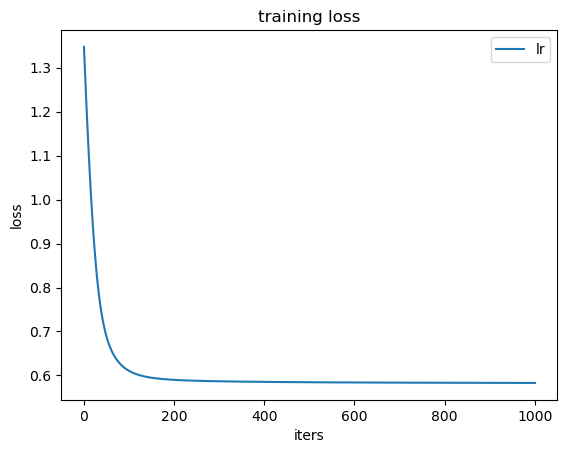

In [20]:
w, loss = reg_logistic_regression_plot(y, tx, LAMBDA, initial_w, 1000, 0.1)

In [21]:
y_pred = predict_logistic(tx, w)
accuracy, precision, recall, f1_score = compute_metrics(y, y_pred)
print(accuracy, precision, recall, f1_score)

0.710308 0.5517594459816474 0.8240162489640118 0.6609489478242551


The best iteration is 1000.


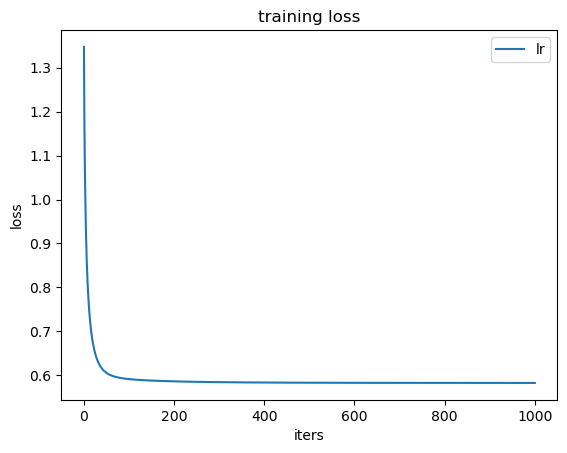

In [22]:
w, loss = reg_logistic_regression_plot(y, tx, LAMBDA, initial_w, 1000, 0.1, optimizer='ada')

In [23]:
y_pred = predict_logistic(tx, w)
accuracy, precision, recall, f1_score = compute_metrics(y, y_pred)
print(accuracy, precision, recall, f1_score)

0.709672 0.5508309313112322 0.8275998926074217 0.6614298108947747


The best iteration is 163.


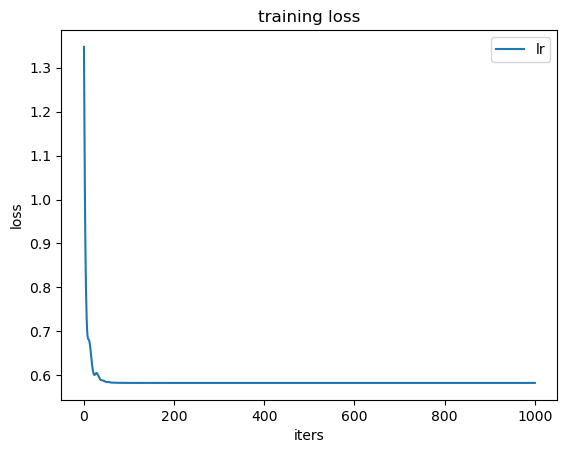

In [24]:
w, loss = reg_logistic_regression_plot(y, tx, LAMBDA, initial_w, 1000, 0.1, optimizer='adam')

In [25]:
y_pred = predict_logistic(tx, w)
accuracy, precision, recall, f1_score = compute_metrics(y, y_pred)
print(accuracy, precision, recall, f1_score)

0.709388 0.5505037177317955 0.8279500857973315 0.6613055862457985


In [26]:
# 针对不同的 pri_jet_num 学习不同模型.

def jet_num_split(tx, y):
    """Split tx into three subsets with different pri_jet_num.

    Args:
        tx: numpy array of shape=(N, D)
        y: numpy array of shape=(N, 1)

    Returns:
        tx_list, y_list: two list of numpy arrays related to different pri_jet_num
    """

    tx_list = [tx[tx[:, -1] == i, :-1] for i in range(4)]
    y_list = [y[tx[:, -1] == i] for i in range(4)]

    return tx_list, y_list

In [27]:
tx_list, y_list = jet_num_split(tx_cleaned, y)
tx_list = [standardization(i) for i in tx_list]

The best iteration is 1000.
The best iteration is 1000.
The best iteration is 1000.
The best iteration is 1000.


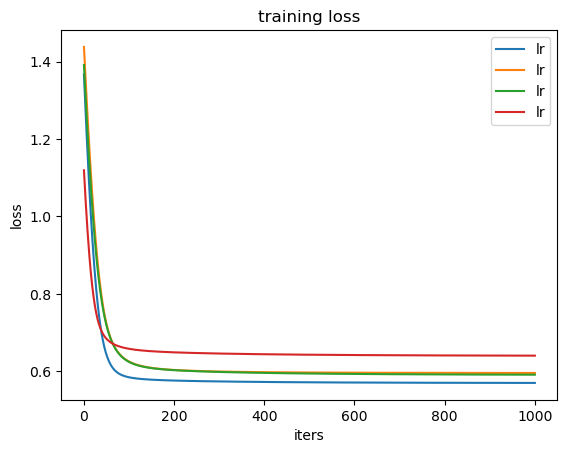

In [28]:
initial_w_list = np.random.rand(tx.shape[1]-1, 4)
w_list = [0, 0, 0, 0]
loss_list = [0, 0, 0, 0]
y_pred, y_true = np.empty((0, 1)), np.empty((0, 1))
for i in range(4):
    w_list[i], loss_list[i] = reg_logistic_regression_plot(y_list[i], tx_list[i], LAMBDA, initial_w_list[:, i].reshape(-1, 1), 1000, 0.1)
    y_pred = np.vstack((y_pred, predict_logistic(tx_list[i], w_list[i])))
    y_true = np.vstack((y_true, y_list[i]))

In [29]:
accuracy, precision, recall, f1_score = compute_metrics(y_true, y_pred)
print(accuracy, precision, recall, f1_score)

0.696292 0.5377215268310819 0.8103703876638613 0.6464746171503601


In [30]:
# 特征增强

def build_poly(tx, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree.
    
    Args:
        tx: numpy array of shape (N, D), N is the number of samples.
        degree: integer.
        
    Returns:
        poly: numpy array of shape (N, degree*D)
    """
    
    N, D = tx.shape
    poly = np.empty((N, 0))
    for i in range(degree):
        poly = np.hstack((poly, tx**(i+1)))
    
    return poly

The best iteration is 784.
The best iteration is 469.
The best iteration is 982.
The best iteration is 382.


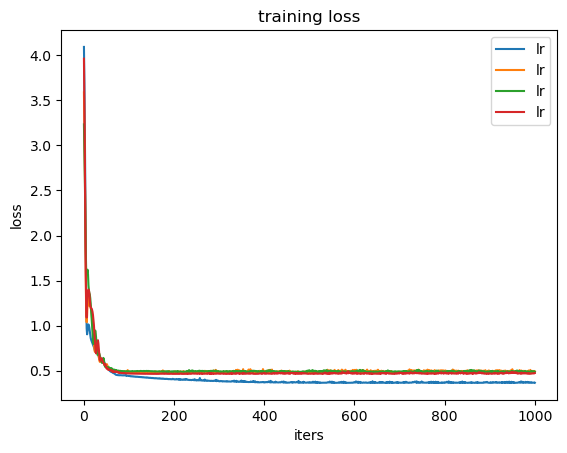

In [66]:
degree = 3
LAMBDA = 1e-3
initial_w_list = np.random.rand((tx.shape[1]-1)*degree, 4)
w_list = [0, 0, 0, 0]
loss_list = [0, 0, 0, 0]
y_pred, y_true = np.empty((0, 1)), np.empty((0, 1))
for i in range(4):
    tx_i = build_poly(tx_list[i], degree)
    w_list[i], loss_list[i] = reg_logistic_regression_plot(y_list[i], tx_i, LAMBDA, initial_w_list[:, i].reshape(-1, 1), 1000, 0.1, optimizer='adam')
    y_pred = np.vstack((y_pred, predict_logistic(tx_i, w_list[i])))
    y_true = np.vstack((y_true, y_list[i]))

In [32]:
accuracy, precision, recall, f1_score = compute_metrics(y_true, y_pred)
print(accuracy, precision, recall, f1_score)

0.797788 0.732580012717253 0.6455344531733339 0.6863082125903632


In [54]:
# 提交 csv

_, tx_raw_test, ids_raw_test = load_csv_data('./data/test.csv')

In [55]:
tx_test_cleaned = tx_raw_test[:, col_mask]
y_pred = np.empty((0, 1))
tx_all = np.vstack((tx_cleaned, tx_test_cleaned))
mean = np.mean(tx_all, axis=0)
std = np.std(tx_all, axis=0)
print(mean.shape, std.shape)

(18,) (18,)


In [67]:
for i in range(len(tx_test_cleaned)):
    w = w_list[int(tx_test_cleaned[i, -1])]
    tx = ((tx_test_cleaned[i, :-1]-mean[:-1])/(std[:-1]+1e-9)).reshape(1, -1)
    tx = build_poly(tx, degree)
    y_pred = np.vstack((y_pred, predict_logistic(tx, w)))

In [68]:
y_pred[y_pred==0] = -1
y_pred = y_pred.astype(int)
y_pred

array([[-1],
       [-1],
       [-1],
       ...,
       [ 1],
       [ 1],
       [-1]])

In [61]:
create_csv_submission(ids_raw_test, y_pred, 'submission_adam_alltrain.csv')